# ПОДРОБНОЕ ОПИСАНИЕ ДАННЫХ В ФАЙЛЕ abalone.name

In [1]:
import pandas as pd
import random
import numpy as np
random.seed(13)
np.random.seed(13)

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [2]:
path = 'abalone.data'
abalone = pd.read_csv(path)
print(f'Sex unique: {abalone.Sex.unique()}')
abalone.head()

Sex unique: ['M' 'F' 'I']


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Посмотрим на баланс классов
# В данном случае достаточно метрики accuracy, классы хорошо сбалансированы
abalone.Sex.value_counts() 

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [4]:
print(f'Sex unique: {abalone.Sex.unique()}')
abalone = pd.get_dummies(data=abalone)
abalone.head()

Sex unique: ['M' 'F' 'I']


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier (без использования конвееров)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as clfrep

In [6]:
scaler = StandardScaler()
features = scaler.fit_transform(abalone.iloc[:,:8].values)
print(f'shape of features:\n {features.shape}')
print(f'sample features:\n {features[:5]}')

shape of features:
 (4177, 8)
sample features:
 [[-0.57455813 -0.43214879 -1.06442415 -0.64189823 -0.60768536 -0.72621157
  -0.63821689  1.57154357]
 [-1.44898585 -1.439929   -1.18397831 -1.23027711 -1.17090984 -1.20522124
  -1.21298732 -0.91001299]
 [ 0.05003309  0.12213032 -0.10799087 -0.30946926 -0.4634999  -0.35668983
  -0.20713907 -0.28962385]
 [-0.69947638 -0.43214879 -0.34709919 -0.63781934 -0.64823753 -0.60759966
  -0.60229374  0.02057072]
 [-1.61554351 -1.54070702 -1.42308663 -1.27208566 -1.2159678  -1.28733718
  -1.32075677 -0.91001299]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, abalone.iloc[:,8:].values, shuffle=True)

In [8]:
clf_knn = KNeighborsClassifier().fit(X_train, y_train)
clf_knn.score(X_test, y_test)

0.4842105263157895

1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
pipe = Pipeline([('scaler',StandardScaler()),('clf', KNeighborsClassifier())])
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.48229665071770333

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {'n_neighbors':range(1, 20)}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    6.7s finished


In [13]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.49840612277134894)

2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf_dt = DecisionTreeClassifier().fit(X_train,y_train)
clf_dt.score(X_test, y_test)

0.5052631578947369

2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [16]:
params = {'max_depth':range(2,10,2), 'min_samples_split':range(2,10,2), 'max_features':range(2, 8,2)}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, verbose=1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.7s finished


In [17]:
grid.score(X_test,y_test)

0.47081339712918663

Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

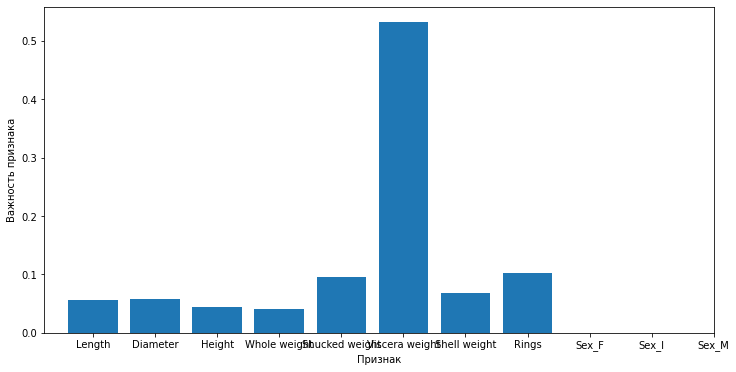

In [18]:
import matplotlib.pyplot as plt
import numpy as np

features_imp = grid.best_estimator_.feature_importances_
n_features = abalone.shape[1]

plt.subplots(figsize=(12,6))
plt.bar([x for x in range(len(features_imp))], features_imp)
plt.xticks(range(abalone.shape[1]),abalone.columns)
plt.ylabel("Важность признака")
plt.xlabel("Признак")
plt.show()

3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_train,y_train)
forest.score(X_test,y_test)

0.4258373205741627

In [21]:
forest_params={'n_estimators':range(10, 400, 10), 'max_depth':range(2, 10, 2)}
grid = GridSearchCV(RandomForestClassifier(), forest_params, cv=5, n_jobs=-1, verbose=True).fit(X_train,y_train)
grid.score(X_test, y_test)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:  7.5min finished


0.42200956937799045

# Итог
Наиболее точной моделью при учете метрики accuracy является RandomForest.